<h1>6. Seaborn</h1>

## 6.1. Seaborn
+ Seaborn
  + Matplotlib 라이브러리를 기반으로 개발된 고급 통계 데이터 시각화 라이브러리
  + 다양한 테마와 통계 그래프를 지원하며, 시각적으로 세련된 그래프를 쉽게 생성할 수 있음
  + Matplotlib 라이브러리에 의존하므로, 사용 시 함께 불러와야 함

<br>

|주요 특징|시각화 단계|
|:---------------|:---------------|
|- 뛰어난 시각화 효과 <br>- 간결한 구문 제공 <br>- Pandas 데이터프레임에 최적화 <br>- 쉬운 데이터프레임 집계 및 그래프 요약|- 데이터 준비 <br>- 배경 설정 <br>- 시각화 <br>- 개별 그래프 상세 설정|

<br>

<br>

+ \[데이터\] 공공데이터포털에서 제공하는 2020년 국민건강보험공단 건강검진 정보
  + gender, height, weight, waist, smoking, drinking 등 18개 변수
  + \[실습파일\] [05_data1.csv](./data/05_data1.csv)

<br>

## 6.2. 막대 그래프

<br>

In [1]:
# Seaborn 라이브러리 설치
#!pip install seaborn

In [2]:
# Seaborn 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd

In [4]:
# 데이터 불러오기
data = pd.read_csv('./data/05_data1.csv')
data.head()

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0


In [5]:
# 데이터 전처리 : 라벨 매핑(label mapping)
# replace() 함수는 명시되지 않은 값을 그대로 유지하지만,
# map() 함수는 명시되지 않은 값을 NaN으로 처리함
data6 = data.copy()
data6 = data6.loc[:, ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
data6['gender'] = data['gender'].replace({1: 'M', 2: 'F'})
data6['drinking'] = data['drinking'].replace({0: 'Non-drinking', 1: 'Drinking'})
data6['smoking'] = data['smoking'].replace({1: 'Non-smoking', 2: 'Quit-smoking', 3: 'Smoking'})
data6.head()

,gender,height,weight,waist,drinking,smoking
0,M,165,60,72.1,Non-drinking,Non-smoking
1,F,155,50,75.2,Non-drinking,Non-smoking
2,M,185,85,94.0,Drinking,Smoking
3,M,165,80,93.0,Drinking,Smoking
4,F,150,50,82.0,Non-drinking,Non-smoking


In [6]:
# 데이터 집계 :성별 음주 여부별 빈도
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()
drinking

,gender,drinking,count
0,F,Drinking,611
1,F,Non-drinking,888
2,M,Drinking,1086
3,M,Non-drinking,415


In [7]:
# 데이터 집계 :성별 흡연 상태별 빈도
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()
smoking

,gender,smoking,count
0,F,Non-smoking,1422
1,F,Quit-smoking,45
2,F,Smoking,32
3,M,Non-smoking,502
4,M,Quit-smoking,519
5,M,Smoking,480


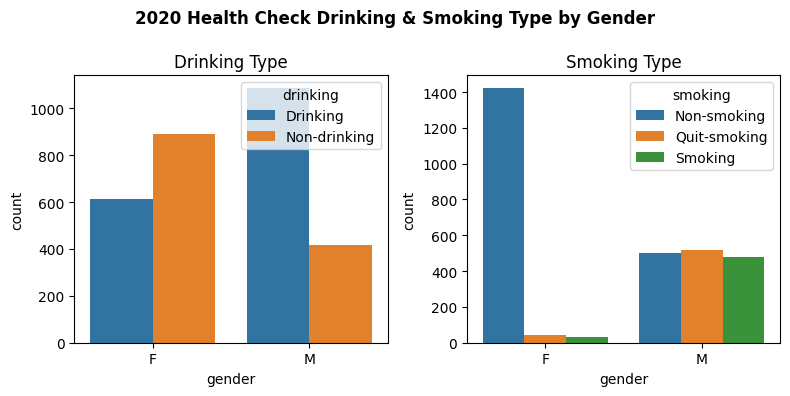

In [8]:
# 막대 그래프 : 성별에 따른 음주 여부, 흡연 상태 분포
fig = plt.figure(figsize=(8, 4))
area1 = fig.add_subplot(1, 2, 1)
area2 = fig.add_subplot(1, 2, 2)

ax1 = sns.barplot(x='gender', y='count', hue='drinking', data=drinking, ax=area1)
ax2 = sns.barplot(x='gender', y='count', hue='smoking', data=smoking, ax=area2)

fig.suptitle('2020 Health Check Drinking & Smoking Type by Gender', fontweight='bold')
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

## 6.3. 히스토그램

<br>

In [9]:
# 데이터 전처리 : 성별에 따라 데이터 분리
maledata = data6.copy()
maledata = maledata.loc[maledata['gender']=='M',:]

femaledata = data6.copy()
femaledata = femaledata.loc[femaledata['gender']=='F',:]

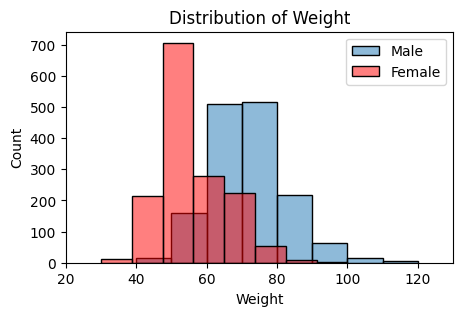

In [10]:
# 히스토그램 : 성별에 따른 몸무게 분포
plt.figure(figsize=(5, 3))
sns.histplot(maledata['weight'], bins=8, alpha=0.5, label='Male')
sns.histplot(femaledata['weight'], bins=8, alpha=0.5, label='Female', color='r')
plt.xlim(20, 130)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.legend()
plt.show()

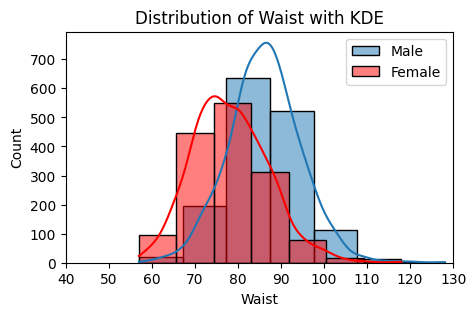

In [11]:
# 히스토그램 & 커널 밀도 추정(KDE) : 성별에 따른 허리둘레 분포
plt.figure(figsize=(5, 3))
sns.histplot(maledata['waist'], bins=7, alpha=0.5, label='Male', kde=True)
sns.histplot(femaledata['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)
plt.xlim(40,130)
plt.xlabel('Waist')
plt.ylabel('Count')
plt.title('Distribution of Waist with KDE')
plt.legend()
plt.show()

## 6.4. 상자수염 그래프

<br>

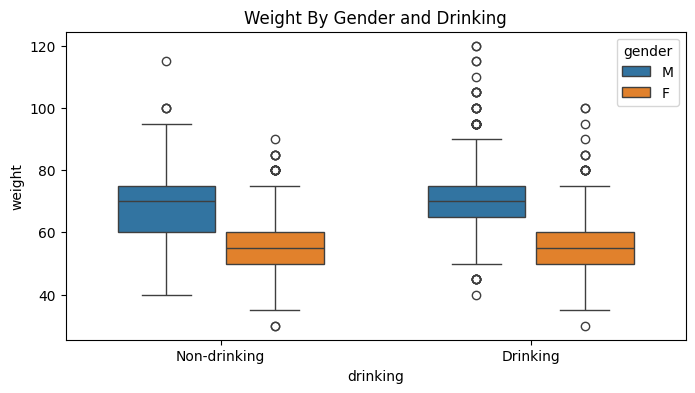

In [12]:
# 상자수염 그래프 : 성별 및 음주 여부에 따른 몸무게 분포
plt.figure(figsize=(8, 4))
plt.title('Weight By Gender and Drinking')
sns.boxplot(x='drinking', y='weight', hue='gender', dodge = True, width=0.7, gap = 0.1, data=data6)
plt.show()

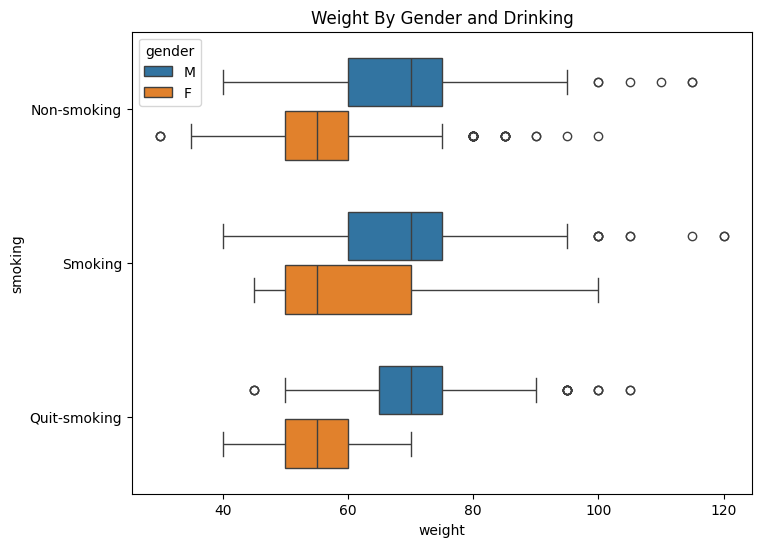

In [13]:
# 상자수염 그래프 : 성별 및 흡연 상태에 따른 몸무게 분포
plt.figure(figsize=(8, 6))
plt.title('Weight By Gender and Drinking')
sns.boxplot(x='weight', y='smoking', hue='gender', width=0.7, gap=0.1, data=data6, orient='h')
plt.show()

## 6.5. 카운트 플롯(count plot)
- 범주형 변수의 각 항목별 빈도를 막대 그래프로 표현함
- 데이터의 범주별 분포를 직관적으로 파악할 수 있음

<br>

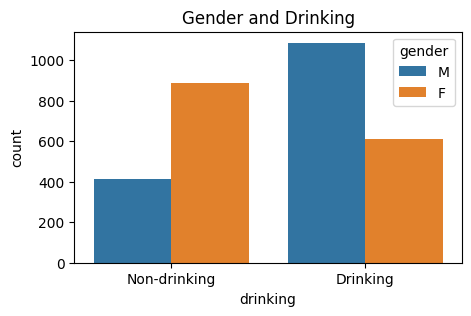

In [14]:
# 카운트 플롯1 : 음주 여부에 따른 성별 분포
plt.figure(figsize=(5, 3))
plt.title('Gender and Drinking')
sns.countplot(x='drinking', hue='gender', data=data6)
plt.show()

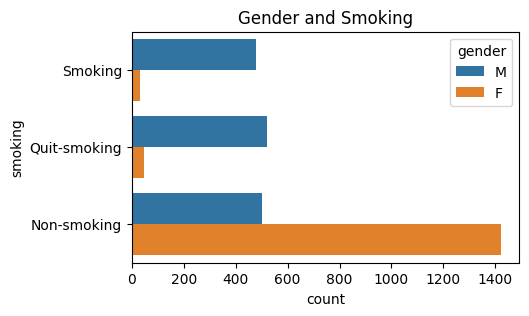

In [15]:
# 카운트 플롯2 : 흡연 상태에 따른 성별 분포
plt.figure(figsize=(5, 3))
plt.title('Gender and Smoking')
sns.countplot(y='smoking', hue='gender',
              data=data6, order=['Smoking', 'Quit-smoking', 'Non-smoking'])
plt.show()

## 6.5. 히트맵(heatmap)
- 행과 열로 이루어진 2차원 행렬 데이터를 색상으로 시각화함
- 두 범주형 변수 간의 관계나 상관관계를 나타낼 때 사용
- 색상의 강도를 통해 값의 크기를 비교할 수 있음
- 예 : 상관행렬, 교차표 등

<br>

In [16]:
# 데이터 전처리 : 키, 몸무게, 허리둘레, 수축기 혈압, 이완기 혈압, 총콜레스테롤, HDL 콜레스테롤, LDL 콜레스테롤 변수 선택
data8 = data.copy()
data8 = data8.loc[:, ['height', 'weight', 'waist', 'systolic', 'diastolic', 'cholesterol', 'HDL', 'LDL']]

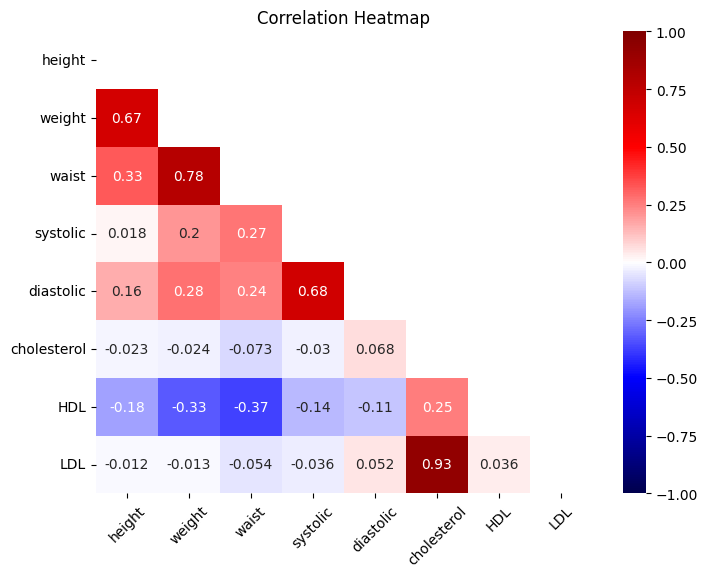

In [17]:
# 히트맵 : 8개의 건강 지표 간 상관관계
# 상관계수는 -1에서 +1 사이의 값을 가지므로, vmin=-1, vmax=1 옵션 설정으로 색상 범위의 균형을 맞춤
correlation_data8 = data8.corr()
upp_mat = np.triu(correlation_data8)

plt.figure(figsize=(8, 6))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_data8, annot=True, mask=upp_mat, cmap='seismic', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

<br>

## 6.7. 기타 시각화

|시각화 유형|설명|
|:------:|:------------------------|
|스트립 플롯 <br>(strip plot)|- 데이터 분포를 요약하여 간략히 띠 형태로 시각화함 <br>- 일반적으로 x축에는 범주형 변수, y축에는 수치형 변수를 지정함 <br>- 주로 데이터 수가 적을 때 사용됨|
|스웜 플롯 <br>(swarm plot)|- 스트립 플롯과 유사하지만, 점들을 겹치지 않도록 자동으로 위치를 조정함 <br>- 분포를 보여줄 때 효과적이나, 데이터 수가 많을 때에는 개수를 대략적으로 파악하기 어려움|
|바이올린 플롯 <br>(violin plot)|- 커널 밀도 추정(KDE)을 이용하여 데이터의 분포를 시각화함 <br>- 상자수염 그래프와 KDE를 결합한 형태로 중앙값, 사분위수, 전체 분포를 동시에 보여줌 <br>- 분포를 비교하는 데 효과적이나, 데이터 수가 적을 경우 왜곡된 해석 가능성 있음|

<br>

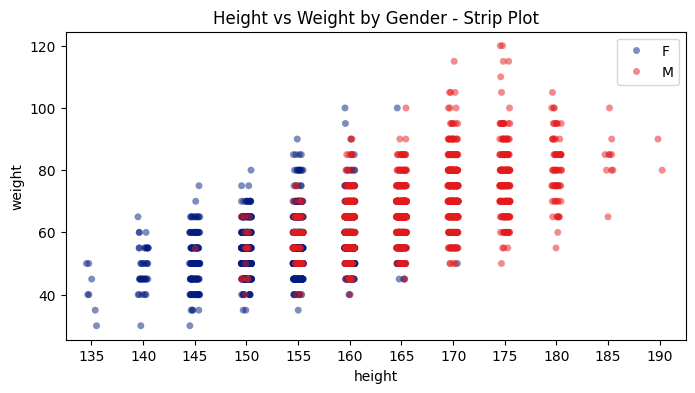

In [18]:
# 스트립 플롯 : 키와 몸무게, 성별의 관계
plt.figure(figsize=(8, 4))
plt.title('Height vs Weight by Gender - Strip Plot')
sns.stripplot(x='height', y='weight', hue='gender', alpha=0.5, palette='dark', data=femaledata)
sns.stripplot(x='height', y='weight', hue='gender', alpha=0.5, palette='Set1', data=maledata)
plt.legend()
plt.show()

In [19]:
# 데이터 전처리 : 남성, 여성 각각 100개 데이터 선택
maledata100 = maledata.head(100)
femaledata100 = femaledata.head(100)

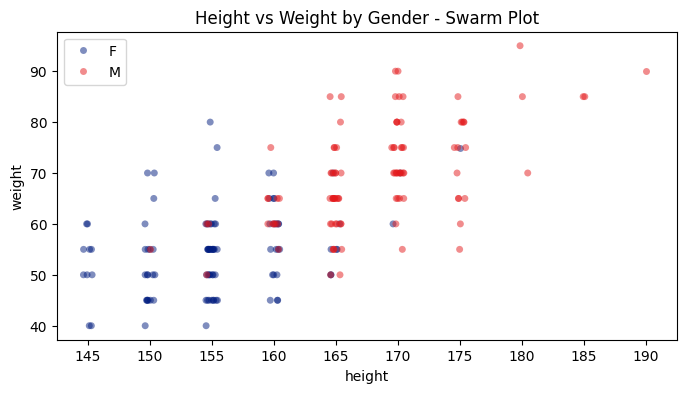

In [20]:
# 스웜 플롯 : 키와 몸무게, 성별의 관계
plt.figure(figsize=(8, 4))
plt.title('Height vs Weight by Gender - Swarm Plot')
sns.stripplot(x='height', y='weight', hue='gender', alpha=0.5, palette='dark', data=femaledata100)
sns.stripplot(x='height', y='weight', hue='gender', alpha=0.5, palette='Set1', data=maledata100)
plt.legend()
plt.show()

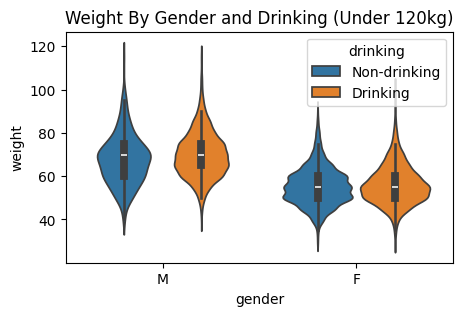

In [21]:
# 바이올린 플롯1 : 성별 및 음주 여부별 몸무게(120 미만) 분포
plt.figure(figsize=(5, 3))
plt.title('Weight By Gender and Drinking (Under 120kg)')
sns.violinplot(x='gender', y='weight', hue='drinking', gap=0.1, data=data6[data6.weight<120])
plt.show()

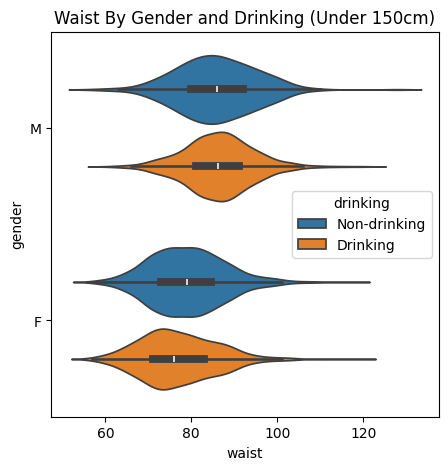

In [22]:
# 바이올린 플롯2 : 성별 및 음주 여부별 허리둘레(150 미만) 분포
plt.figure(figsize=(5, 5))
plt.title('Waist By Gender and Drinking (Under 150cm)')
sns.violinplot(y='gender', x='waist', hue='drinking', gap=0.1, data=data6[data6.waist<150])
plt.show()